In [35]:
# multidimensional arrays and algebra tools
import numpy as np
# useful function to plot datas
import matplotlib.pyplot as plt

In [142]:
# FUNCTIONS
# draw line : y = mx + b, where y=x2 array of points and x : array of horizontal points
def draw(x1, x2):
    ln = plt.plot(x1, x2,'-')
# calculate the probability of the score instead of step function which is discrete (O or 1)
def sigmoid(score):
    return 1/(1 + np.exp(-score))

# cross entropy 
def calculate_error(line_parameters, points, y):
    # shape : return the number of row and colons     
    m = points.shape[0]
    p = sigmoid(points*line_parameters)
    # multiplication order : dim(row)*dim(col)      
    cross_entropy = -(1/m)*(np.log(p).T * y + np.log((1 - p)).T*(1 - y))
    return cross_entropy
 
def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(5000):
        p = sigmoid(points*line_parameters)
        gradient = (points.T*(p-y))*(alpha/m)
        # line_parameters : [[w1]
        #                   [w2]
        #                    [b]]  

        line_parameters = line_parameters - gradient
        # the minimum and maximum point where the model will start learning
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max()])
        x2 = - b / w2 + x1*(- w1 / w2)
    draw(x1, x2)

In [143]:
# GLOBAL PARAMETERS and SETTINGS

# numbers of points
n_pts = 100

# line parameters
# w1x1 + w2x2 + b = 0
w1 = -0.2
w2 = -0.35
b = 3.5

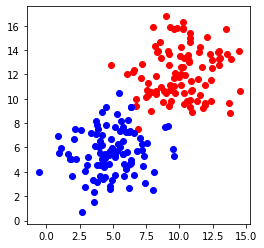

In [144]:

# to display the same random numbers every time we launch the program
np.random.seed(0)
# TOP the scoring line 
# horizontal random points on the top or above the scoring line based on normal law
random_x1_values = np.random.normal(10, 2, n_pts)
# vertical points on the top or above the scoring line based on normal law
random_x2_values = np.random.normal(12, 2, n_pts)
# array of combines x and y points
top_region = np.array([random_x1_values, random_x2_values]).T

# BOTTOM the scoring line 
# horizontal random points on the top or above the scoring line based on normal law
# vertical points on the top or above the scoring line based on normal law
# array of combines x and y points
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts)]).T

# plt return a tuple fig and ax
_, ax = plt.subplots(figsize=(4, 4))
# display red points
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
# display blue points
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
plt.show()


In [148]:
# Implementig SIGMOID function to reduce errors!!!

# to display the same random numbers every time we launch the program
np.random.seed(0)
# bias
bias = np.ones(n_pts)

# TOP the scoring line 
# horizontal random points on the top or above the scoring line based on normal law
random_x1_values = np.random.normal(10, 2, n_pts)
# vertical points on the top or above the scoring line based on normal law
random_x2_values = np.random.normal(12, 2, n_pts)
# array of combines x and y points
top_region = np.array([random_x1_values, random_x2_values, bias]).T

# BOTTOM the scoring line 
# horizontal random points on the top or above the scoring line based on normal law
# vertical points on the top or above the scoring line based on normal law
# array of combines x and y points
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T

# vstack : matrix concatanation vertically into a single one
all_points = np.vstack((top_region, bottom_region))
# print(all_points)

#line_parameters = np.matrix([w1, w2, b]).T
# print(line_parameters)
# print(line_parameters)
# w1x1 + w2x2 + b = 0
# x2 = - b / w2 + x1*(- w1 / w2)
# x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
# x2 = - b / w2 + x1*(- w1 / w2)
# print(x1, x2)

# we the parameter to be found by the computer
line_parameters = np.matrix(np.zeros(3)).T

# negative combination : negative score
# positive combination : positive score
linear_combination = all_points*line_parameters
#print(linear_combination)
# the far the point is below the line : high probability 
# the far the point is above the line : low probability 
probablities = sigmoid(linear_combination)
# print(probablities)
# To create labels for top and bottom points 
# top points : zero(proba)
# bottom points : ones(probas)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
# print(y)

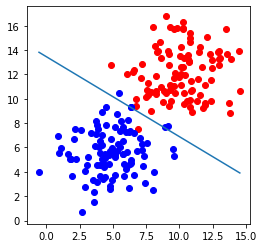

In [149]:
# plt return a tuple fig and ax
_, ax = plt.subplots(figsize=(4, 4))
# display red points
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
# display blue points
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
gradient_descent(line_parameters, all_points, y, 0.06)
# draw a line
# draw(x1, x2)
plt.show()

In [151]:
#error accuracy
print((calculate_error(line_parameters, all_points, y)))

[[0.69314718]]
